In [2]:
import pickle
alexnet_results = pickle.load(open("./alexnet5-9results.p", "rb"))

## Show predictions and label distributions

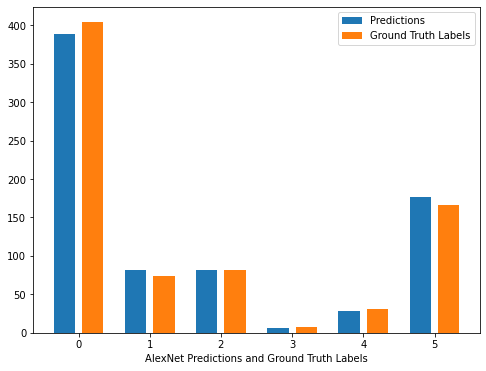

In [7]:
import numpy as np
import matplotlib.pyplot as plt
final_epoch_predicted = np.array(alexnet_results["predicted_labels"][-1])
predicted_counts = np.unique(final_epoch_predicted, return_counts=True)[1]

final_epoch_truth_labels = alexnet_results["ground_truth_labels"][-1]
label_counts = np.unique(final_epoch_truth_labels, return_counts=True)[1]


fig = plt.figure()
ax = fig.add_subplot()
fig.set_size_inches(8, 6)
indices = np.array(list(range(6)))
ax.bar(indices - 0.2, predicted_counts, 0.3,label='Predictions')
ax.bar(indices + 0.2, label_counts, 0.3, label='Ground Truth Labels')
ax.set_xlabel('AlexNet Predictions and Ground Truth Labels')
plt.legend()
plt.show()

In [8]:
# Show keys from the evaluation results file
alexnet_results.keys()

dict_keys(['epoch_acc', 'epoch_loss', 'predicted_labels', 'prediction_probabilities', 'ground_truth_labels'])

In [9]:
# Each key is a list, with list indices corresponding to epochs. 
# To evaluate the model at the end of the training, examine the final epoch.
alexnet_results["epoch_acc"][-1]

0.8952879581151832

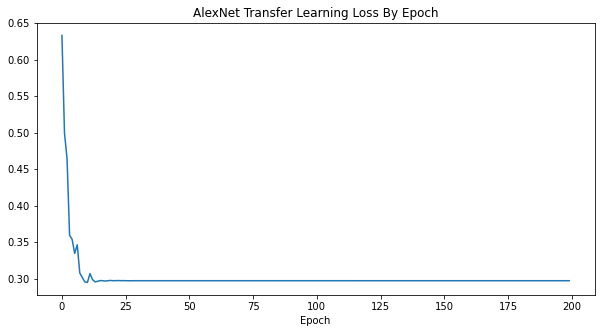

In [43]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title("AlexNet Transfer Learning Loss By Epoch")
ax.set_xlabel("Epoch")
plt.plot(range(len(alexnet_results["epoch_loss"])), alexnet_results["epoch_loss"])

In [44]:
alexnet_results["epoch_loss"][-1]

0.2971726656770724

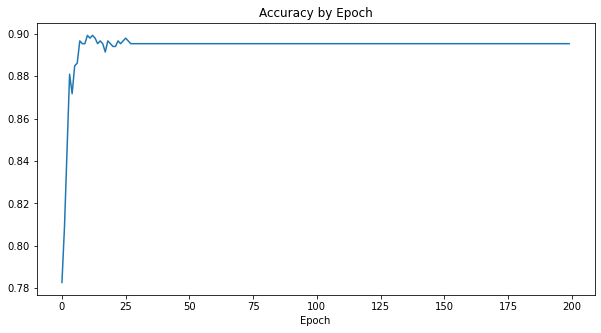

In [42]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title("Accuracy by Epoch")
ax.set_xlabel("Epoch")
plt.plot(range(len(alexnet_results["epoch_acc"])), alexnet_results["epoch_acc"])

### This model had 89% accuracy.

The classes in the Deep Mars dataset are as follows:

0: Other

1: Crater

2: Dark Dune

3: Streak

4: Bright Dune

5: Impact

6: Edge

However, there are no instances of impact. Therefore, the true labels as seen here are:

0: Other

1: Crater

2: Dark Dune

3: Streak

4: Bright Dune

5: Edge


## Evaluate per-class precisions and recalls.

These are calculated in a method within the marsvision package which generates confusion matrices per clas.

In [11]:
from marsvision.utilities import cnn_eval
# This dataframe contains evaluation metrics for every epoch (as a row). 
cnn_eval_df = cnn_eval.get_evaluation_dataframe("./alexnet5-9results.p")

c:\users\dpale\desktop\projects\marsvision\marsvision\utilities\cnn_eval.py:24: RuntimeWarning: invalid value encountered in longlong_scalars
  recall = matrix[1][1] / (matrix[0][1] + matrix[1][1])
c:\users\dpale\desktop\projects\marsvision\marsvision\utilities\cnn_eval.py:24: RuntimeWarning: invalid value encountered in longlong_scalars
  recall = matrix[1][1] / (matrix[0][1] + matrix[1][1])
c:\users\dpale\desktop\projects\marsvision\marsvision\utilities\cnn_eval.py:24: RuntimeWarning: invalid value encountered in longlong_scalars
  recall = matrix[1][1] / (matrix[0][1] + matrix[1][1])
c:\users\dpale\desktop\projects\marsvision\marsvision\utilities\cnn_eval.py:24: RuntimeWarning: invalid value encountered in longlong_scalars
  recall = matrix[1][1] / (matrix[0][1] + matrix[1][1])


### Show raw scores.

In [20]:
# We want the final row (representing the final epoch and the model's final state)
cnn_eval_df.iloc[-1]

accuracy       0.895288
precision_0    0.893564
precision_1    0.851351
precision_2    0.914634
precision_3    0.714286
precision_4    0.741935
precision_5    0.945783
recall_0       0.928021
recall_1       0.768293
recall_2       0.914634
recall_3       0.833333
recall_4       0.821429
recall_5       0.887006
Name: 199, dtype: float64

### Show barplots of precisions and recalls.

Text(0.5, 1.0, 'Alexnet CNN | Precision On 80/20 Stratified Split')

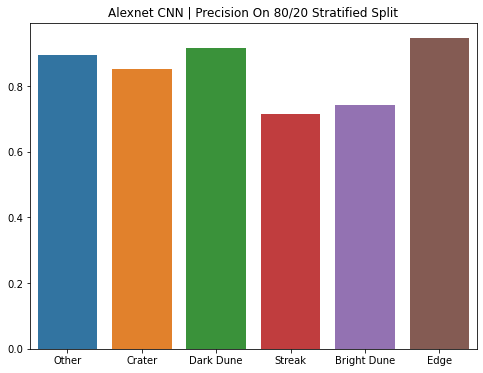

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
class_names = ["Other", "Crater", "Dark Dune", "Streak", "Bright Dune", "Edge"]
precisions = np.array(cnn_eval_df.iloc[-1][1:7])
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=class_names, y=precisions)
ax.set_title("Alexnet CNN | Precision On 80/20 Stratified Split")

Text(0.5, 1.0, 'Alexnet CNN | Recall On 80/20 Stratified Split')

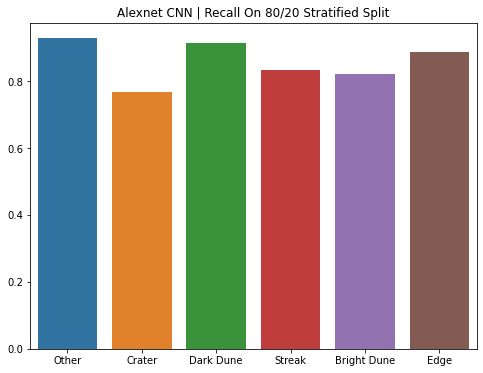

In [22]:
recalls = np.array(cnn_eval_df.iloc[-1][7:13])
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=class_names, y=recalls)
ax.set_title("Alexnet CNN | Recall On 80/20 Stratified Split")

The precisions and recalls per class are overall higher than the baseline model, though the model performs poorly on the Dark Dune class due to a lack of data.